# 📌 Importing important libraries

In [1]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

# 📌 Importing the data

In [148]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv', on_bad_lines = 'skip', engine = 'python')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# 📌 Display basic structure

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# 📌 Finding the shape of the data

In [122]:
print('Shape :', df.shape)
print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Shape : (4340, 8)
Rows : 4340
Columns : 8


**Columns in the Dataset**

* name: Car model name (e.g., Maruti 800 AC, Hyundai Verna 1.6 SX).

* year: Manufacturing year of the car.

* selling_price: Resale value (in INR).

* km_driven: Kilometers driven (indicator of usage/wear).

* fuel: Type of fuel (Petrol, Diesel, CNG, LPG).

* seller_type: Type of seller (Individual, Dealer, Trustmark Dealer).

* transmission: Gear system (Manual, Automatic).

* owner: Ownership history (First Owner, Second Owner, etc.).


**Shape:**

4,340 rows × 8 columns

**Logical Effect of Features on Resale Value**

* name: Indicates brand/model popularity and reputation → premium cars may retain higher resale values.

* year: Older cars generally depreciate → resale value decreases with age.

* selling_price: Target variable (depends on all other features).

* km_driven: More kilometers → more wear/tear → lower resale value.

* fuel: Diesel cars often have higher resale than petrol in India (due to mileage efficiency), though trends are changing with stricter emission norms.

* seller_type: Dealers might price higher; individuals may price lower for quick sales.

* transmission: Automatic cars are typically priced higher than manual, but demand can vary regionally.

* owner: First-owner cars have better resale value compared to second/third/fourth-owner cars (trust & maintenance factors).

# 📌 Check if there are any null values in the data

In [123]:
null_value_tf=df.isnull().sum().any()
if(null_value_tf):
  print('There are null values in the data')
else:
  print('There are no null values in the data')

There are no null values in the data


# 📌 Check for the duplicates in data

In [124]:
dup_value_tf=df.duplicated().sum()
if(dup_value_tf):
  print('There are duplicate values in the data')
else:
  print('No duplicate values in the data')

There are duplicate values in the data


In [132]:
# Count of duplicate records
df.duplicated().sum()


np.int64(763)

In [125]:
# Check the duplicate data
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


# 📌 Drop duplicates

In [149]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(3577, 8)

# 📌 Identify Numerical and Categorical columns

In [134]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['year', 'selling_price', 'km_driven'], dtype='object')
Categorical Columns: Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [128]:
correlation_matrix = df.corr(numeric_only = True)
correlation_matrix['selling_price'].sort_values(ascending = False)

,selling_price
selling_price,1.000000
year,0.424260
km_driven,-0.187359


# 📌 Encode categorical variables

In [150]:
df['owner'] = df['owner'].replace({'Fourth & Above Owner': '4th_Owner'})
categorical_cols = ['fuel', 'seller_type', 'transmission','owner']

# Encode categorical variables using one-hot encoding for modeling
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded = df_encoded.replace({False : 0, True : 1})
df_encoded.head()

,name,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_4th_Owner,owner_First Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


1. Missing Entries

✅ No missing values in any column.

2. Duplicate Rows

Found 763 duplicate rows.

After removal, dataset size reduced to 3,577 rows × 8 columns.

3. Categorical Feature Inspection

Unique categories detected:

fuel → Petrol, Diesel, CNG, LPG, Electric

seller_type → Individual, Dealer, Trustmark Dealer

transmission → Manual, Automatic

owner → First Owner, Second Owner, Third Owner, Fourth & Above Owner, Test Drive Car

👉 These categories are consistent, no unexpected labels.

4. Encoding for Modeling

Applied One-Hot Encoding (drop-first to avoid dummy variable trap).
Example encoded features:

fuel_Diesel, fuel_Electric, fuel_LPG, fuel_Petrol

seller_type_Individual, seller_type_Trustmark Dealer

transmission_Manual

owner_Second Owner, owner_Third Owner, owner_Fourth & Above Owner, owner_Test Drive Car

Now the dataset is ready for numerical modeling.

# 📌 Average selling price by name

In [ ]:
# Average selling price by name of car
average_selling_price = df_encoded.groupby('name')['selling_price'].mean()
print("Average Selling Price:", average_selling_price)


Average Selling Price: name
Ambassador CLASSIC 1500 DSL AC           120000.0
Ambassador Classic 2000 Dsz               50000.0
Ambassador Grand 1800 ISZ MPFI PW CL     430000.0
Audi A4 1.8 TFSI                        1200000.0
Audi A4 2.0 TDI                         1295000.0
                                          ...    
Volkswagen Vento Petrol Highline AT      284500.0
Volvo V40 D3 R Design                   1975000.0
Volvo XC 90 D5 Inscription BSIV         4500000.0
Volvo XC60 D3 Kinetic                   1750000.0
Volvo XC60 D5 Inscription               2000000.0
Name: selling_price, Length: 1491, dtype: float64


# 📌 Visualization on top 10 average selling price by cars

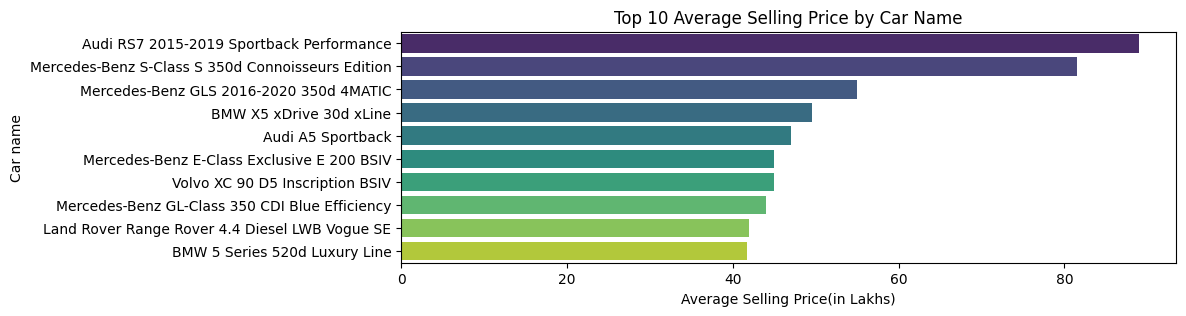

In [ ]:
# Visualize top 10 average selling price by car name
top_10_average_selling_price = average_selling_price.sort_values(ascending=False).head(10)
plt.figure(figsize = (10, 3))
sns.barplot(x = list(top_10_average_selling_price.values/100000), y = list(top_10_average_selling_price.keys()), palette = 'viridis')
plt.title('Top 10 Average Selling Price by Car Name')
plt.xlabel('Average Selling Price(in Lakhs)')
plt.ylabel('Car name')
plt.show()

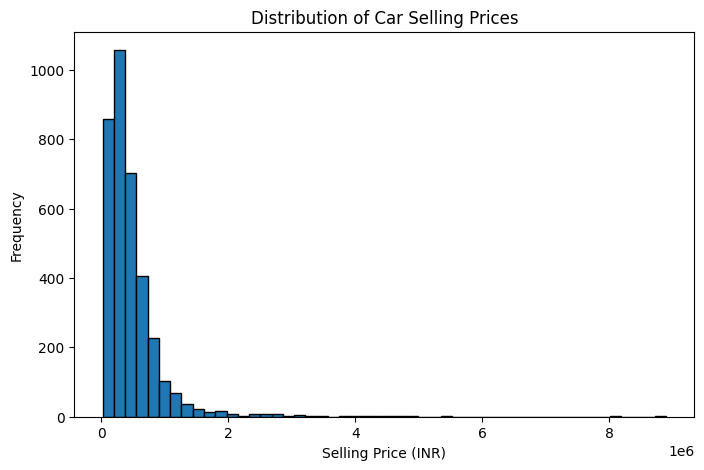

In [ ]:
# Selling price distribution
plt.figure(figsize=(8,5))
plt.hist(df_encoded["selling_price"], bins=50, edgecolor="k")
plt.xlabel("Selling Price (INR)")
plt.ylabel("Frequency")
plt.title("Distribution of Car Selling Prices")
plt.show()

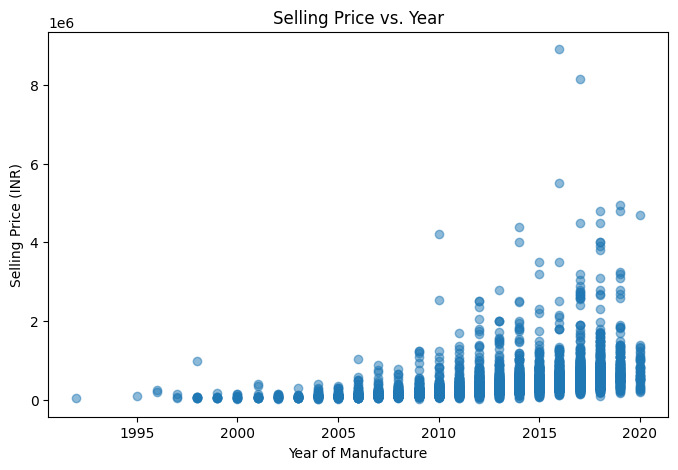

In [ ]:
# Relationship: selling_price vs year
plt.figure(figsize=(8,5))
plt.scatter(df_encoded["year"], df_encoded["selling_price"], alpha=0.5)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (INR)")
plt.title("Selling Price vs. Year")
plt.show()

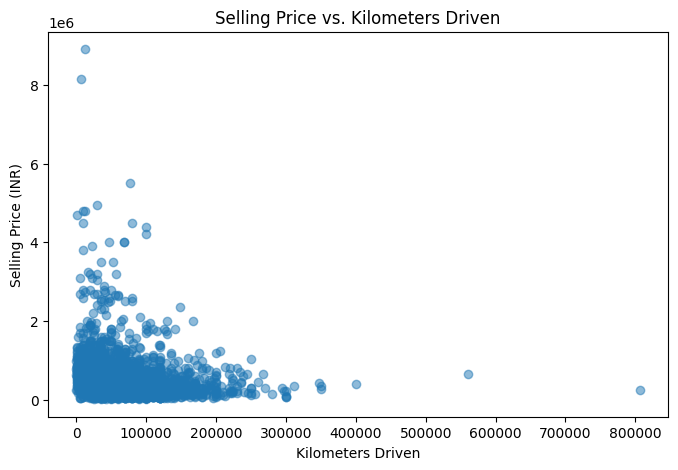

In [ ]:
# Relationship: selling_price vs km_driven
plt.figure(figsize=(8,5))
plt.scatter(df_encoded["km_driven"], df_encoded["selling_price"], alpha=0.5)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.title("Selling Price vs. Kilometers Driven")
plt.show()

<Figure size 1500x900 with 0 Axes>

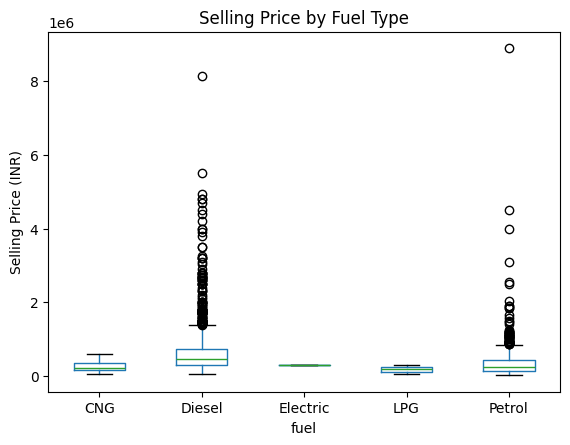

<Figure size 800x500 with 0 Axes>

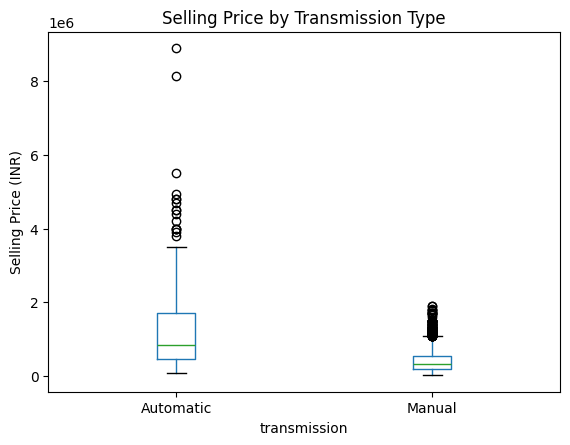

<Figure size 800x500 with 0 Axes>

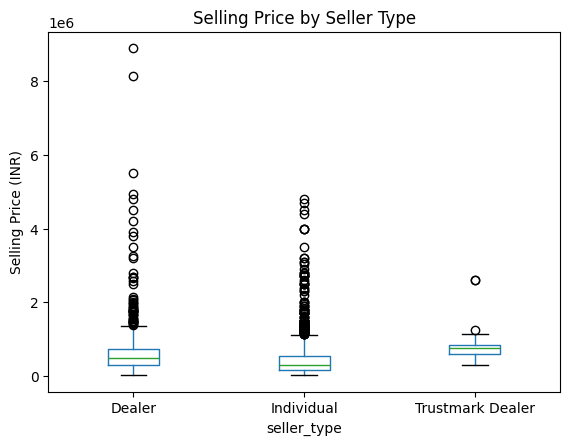

In [ ]:
# Categorical impact: Boxplots for fuel, transmission, seller_type
plt.figure(figsize=(15,9))
df.boxplot(column="selling_price", by="fuel", grid=False)
plt.title("Selling Price by Fuel Type")
plt.suptitle("")
plt.ylabel("Selling Price (INR)")
plt.show()

plt.figure(figsize=(8,5))
df.boxplot(column="selling_price", by="transmission", grid=False)
plt.title("Selling Price by Transmission Type")
plt.suptitle("")
plt.ylabel("Selling Price (INR)")
plt.show()

plt.figure(figsize=(8,5))
df.boxplot(column="selling_price", by="seller_type", grid=False)
plt.title("Selling Price by Seller Type")
plt.suptitle("")
plt.ylabel("Selling Price (INR)")
plt.show()

# Exploratory Data Analysis (EDA) shows:

**1. Selling Price Distribution**

The distribution is highly right-skewed.

Most cars sell for under ₹10 lakh, but there are extreme outliers above ₹50 lakh (likely luxury cars).

**2. Selling Price vs. Year of Manufacture**

Newer cars (recent years) generally have higher resale values.

Cars older than 2010 see a sharp depreciation.

**3. Selling Price vs. Kilometers Driven**

Clear negative relationship: higher km driven → lower resale value.

Some outliers: cars with very high km still priced high (possible luxury or premium brands).

**4. Categorical Impacts**

Fuel: Diesel cars generally fetch higher resale than petrol. CNG/LPG cars have lower resale. Electric cars are rare and scattered.

Transmission: Automatics tend to have higher resale prices than manuals.

Seller Type: Dealer and Trustmark Dealer prices are typically higher than Individual sellers.

In [151]:
# Remove outliers
Q1 = df_encoded["selling_price"].quantile(0.25)
Q3 = df_encoded["selling_price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_encoded = df_encoded[(df_encoded["selling_price"] >= lower_bound) & (df_encoded["selling_price"] <= upper_bound)]
df_encoded.shape

(3407, 19)

Outliers have been removed ✅

Original dataset (after cleaning): 3,577 rows × 9 columns

After removing outliers (IQR method): 3,407 rows × 9 columns

This means around 170 extreme-price cars were excluded (likely luxury models with abnormally high resale values).

In [152]:
# Get current year from pd
current_year = pd.Timestamp.now().year
df_encoded['car_age'] = current_year - df_encoded['year']

# 📌 Model Building

# Performing train test split

In [155]:
# Features and Target
X = df_encoded.drop(columns=['name', 'year', 'selling_price'])  # Features
y = df_encoded['selling_price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
numeric_cols = ['km_driven', 'car_age']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train = X_train.select_dtypes(include = ['number'])
X_test = X_test.select_dtypes(include = ['number'])

# Define lighter models
models = {
    "CatBoost": CatBoostRegressor(iterations=300, depth=8, learning_rate=0.1, random_seed=42, verbose=50),
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10),
    "GradientBoosting": GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if name == "RandomForest":
        cv_rf = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        results[name] = {
        "R2": round(r2_score(y_test, y_pred), 2),
        "MSE": round(mean_squared_error(y_test, y_pred), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
        "CV_MSE": round(-cv_rf.mean(), 2)
        }

    else:
     results[name] = {
        "R2": round(r2_score(y_test, y_pred), 2),
        "MSE": round(mean_squared_error(y_test, y_pred), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
        "CV_MSE": 0
    }

results_df = pd.DataFrame(results)
results_df.head()

0:	learn: 242280.2297926	total: 35.6ms	remaining: 10.6s
50:	learn: 156637.2151799	total: 850ms	remaining: 4.15s
100:	learn: 150456.2187524	total: 1.5s	remaining: 2.96s
150:	learn: 146292.8927887	total: 2.01s	remaining: 1.99s
200:	learn: 142275.6318811	total: 2.39s	remaining: 1.18s
250:	learn: 139274.0327276	total: 2.73s	remaining: 533ms
299:	learn: 136490.4462819	total: 3.29s	remaining: 0us


,CatBoost,LinearRegression,RandomForest,GradientBoosting
R2,5.600000e-01,5.300000e-01,5.600000e-01,5.900000e-01
MSE,2.703560e+10,2.891851e+10,2.714119e+10,2.522817e+10
RMSE,1.644251e+05,1.700544e+05,1.647458e+05,1.588338e+05
CV_MSE,0.000000e+00,0.000000e+00,3.011912e+10,0.000000e+00


Gradient Boosting currently performs the best with the highest R² (~0.59) and lowest RMSE.

CatBoost ,Random Forest perform on the similar lines.

# 📌 Hyperparameter Tuning using GridSearchCV for Gradient Boosting

In [156]:
# Hyperparameter tuning for Gradient boosting
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid search for Gradient Boost
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gradient_boosting_model, param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_gradient_boosting_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Predict with best model
y_pred_best_gb = best_gradient_boosting_model.predict(X_test)

# Evaluate the best model
best_gb_results = {
    "Best Params": best_params,
    "R2": round(r2_score(y_test, y_pred_best_gb), 2),
    "MSE": round(mean_squared_error(y_test, y_pred_best_gb), 2),
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred_best_gb)), 2)
}



In [157]:
# print best_gb_results in table manner
best_gb_results = pd.DataFrame(best_gb_results)
best_gb_results.head()

,Best Params,R2,MSE,RMSE
learning_rate,0.01,0.59,2.534154e+10,159190.28
max_depth,3.00,0.59,2.534154e+10,159190.28
n_estimators,300.00,0.59,2.534154e+10,159190.28


In [158]:
print('Best Model :', best_gradient_boosting_model)
print('Best Parameters :', best_params)
print('Best Score (r2) :', round(best_score, 2))

Best Model : GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)
Best Parameters : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Score (r2) : 0.56


# 📌 Hyperparameter Tuning using GridSearchCV for Cat Boost

In [182]:
# Define parameter grid for CatBoost
param_grid = {
    'iterations': [200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1, 0.15],
    'random_seed': [42]
}

# Grid search for CatBoost
catboost_model = CatBoostRegressor(verbose=1, random_seed=42)
grid_search = GridSearchCV(catboost_model, param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_catboost_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Predict with best model
y_pred_best_catboost = best_catboost_model.predict(X_test)

# Evaluate the best CatBoost model
best_catboost_results = {
    "Best Params": best_params,
    "R2": round(r2_score(y_test, y_pred_best_catboost), 2),
    "MSE": round(mean_squared_error(y_test, y_pred_best_catboost), 2),
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred_best_catboost)), 2)
}

0:	learn: 248509.6493583	total: 3.54ms	remaining: 705ms
1:	learn: 243037.1837213	total: 4.69ms	remaining: 465ms
2:	learn: 237516.6669567	total: 5.82ms	remaining: 382ms
3:	learn: 232295.9717856	total: 6.87ms	remaining: 337ms
4:	learn: 227857.1679757	total: 7.87ms	remaining: 307ms
5:	learn: 223306.3525470	total: 8.91ms	remaining: 288ms
6:	learn: 218946.9881906	total: 10.1ms	remaining: 278ms
7:	learn: 215113.8196240	total: 11.1ms	remaining: 266ms
8:	learn: 211440.4332110	total: 12.4ms	remaining: 262ms
9:	learn: 208132.0228929	total: 13.4ms	remaining: 254ms
10:	learn: 204843.7281221	total: 14.4ms	remaining: 247ms
11:	learn: 201972.7683669	total: 15.4ms	remaining: 241ms
12:	learn: 199255.2565583	total: 16.5ms	remaining: 238ms
13:	learn: 196895.2632589	total: 17.5ms	remaining: 232ms
14:	learn: 194869.0758262	total: 18.1ms	remaining: 223ms
15:	learn: 192906.3347857	total: 19ms	remaining: 219ms
16:	learn: 190897.0372541	total: 20ms	remaining: 215ms
17:	learn: 189184.0847089	total: 20.9ms	remai

In [183]:
# print best_catboost_results in table manner
best_catboost_results = pd.DataFrame(best_catboost_results)
best_catboost_results.head()

,Best Params,R2,MSE,RMSE
depth,6.00,0.6,2.466385e+10,157047.29
iterations,200.00,0.6,2.466385e+10,157047.29
learning_rate,0.05,0.6,2.466385e+10,157047.29
random_seed,42.00,0.6,2.466385e+10,157047.29


# 📌 Creating optimal model

In [185]:
y_pred_best = best_catboost_results['R2'].iloc[0]
print('Best Model :', best_catboost_model)
print('Best Parameters :', best_params)
print('Best Score (r2) :', round(y_pred_best, 2))

Best Model : <catboost.core.CatBoostRegressor object at 0x7bc5d1fbda60>
Best Parameters : {'depth': 6, 'iterations': 200, 'learning_rate': 0.05, 'random_seed': 42}
Best Score (r2) : 0.6


# 📌 Model training using best params

In [186]:
# Models to train
gradient_boosting_model = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.01)
catboost_model = CatBoostRegressor(iterations=200, depth=6, learning_rate=0.05, random_seed=42)

# Fit models
gradient_boosting_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting_model.predict(X_test)
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate models
metrics_comparison = {
    "Gradient Boosting": {
        "R²": round(r2_score(y_test, y_pred_gb), 2),
        "MSE": round(mean_squared_error(y_test, y_pred_gb), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred_gb)), 2)
    },
    "CatBoost": {
        "R²": round(r2_score(y_test, y_pred_catboost), 2),
        "MSE": round(mean_squared_error(y_test, y_pred_catboost), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred_catboost)), 2)
    }
}


0:	learn: 248509.6493583	total: 1.77ms	remaining: 352ms
1:	learn: 243037.1837213	total: 5.39ms	remaining: 533ms
2:	learn: 237516.6669567	total: 6.96ms	remaining: 457ms
3:	learn: 232295.9717856	total: 7.96ms	remaining: 390ms
4:	learn: 227857.1679757	total: 8.93ms	remaining: 348ms
5:	learn: 223306.3525470	total: 9.9ms	remaining: 320ms
6:	learn: 218946.9881906	total: 10.9ms	remaining: 300ms
7:	learn: 215113.8196240	total: 11.9ms	remaining: 286ms
8:	learn: 211440.4332110	total: 12.9ms	remaining: 273ms
9:	learn: 208132.0228929	total: 13.9ms	remaining: 264ms
10:	learn: 204843.7281221	total: 14.8ms	remaining: 255ms
11:	learn: 201972.7683669	total: 15.8ms	remaining: 247ms
12:	learn: 199255.2565583	total: 16.7ms	remaining: 241ms
13:	learn: 196895.2632589	total: 17.7ms	remaining: 235ms
14:	learn: 194869.0758262	total: 18.3ms	remaining: 226ms
15:	learn: 192906.3347857	total: 19.2ms	remaining: 221ms
16:	learn: 190897.0372541	total: 20.2ms	remaining: 217ms
17:	learn: 189184.0847089	total: 21.2ms	re

,R²,MSE,RMSE
Gradient Boosting,0.59,2.534154e+10,159190.28
CatBoost,0.60,2.466385e+10,157047.29


In [187]:
metrics_comparison_df = pd.DataFrame(metrics_comparison).T
metrics_comparison_df.head()

,R²,MSE,RMSE
Gradient Boosting,0.59,2.534154e+10,159190.28
CatBoost,0.60,2.466385e+10,157047.29


# 📌 Visualize Predicted vs Actual for Gradient Boosting  model

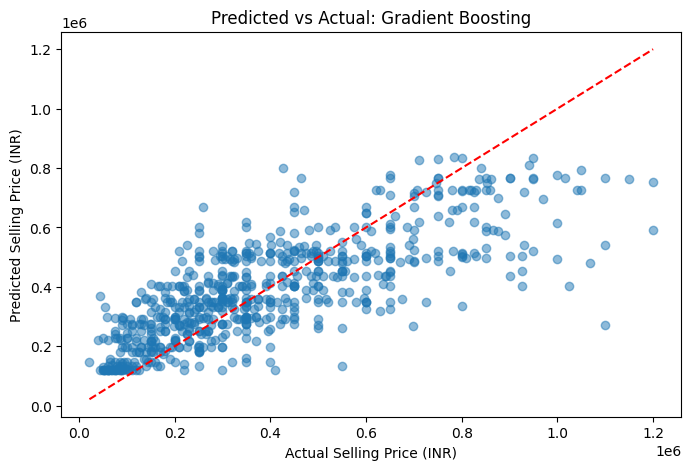

In [188]:
# Visualize Predicted vs Actual for GB  model
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Selling Price (INR)")
plt.ylabel("Predicted Selling Price (INR)")
plt.title("Predicted vs Actual: Gradient Boosting")
plt.show()

# 📌 Visualize Predicted vs Actual for CatBoost  model

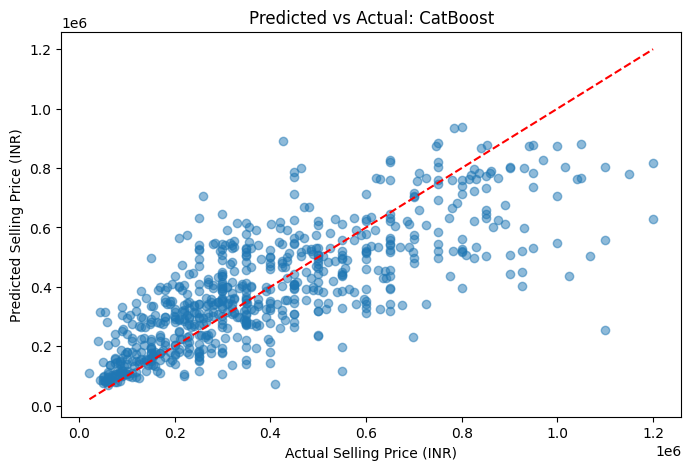

In [189]:
# Visualize Predicted vs Actual for CB model
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_catboost, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Selling Price (INR)")
plt.ylabel("Predicted Selling Price (INR)")
plt.title("Predicted vs Actual: CatBoost")
plt.show()

# Insights:

Catboost performs slightly better with an R² of 0.6 and a lower RMSE compared to Gradient Boosting.

Gradient Boosting is very close behind, with slightly higher MSE and RMSE.

# Visualizations:

Both models show a strong correlation between Actual vs Predicted prices, though some spread in predictions exists, particularly for higher-price outliers.

# 📌 Saving model in pickle file format

In [190]:
# Saving the model in PICKLE file format
import pickle
pickle.dump(catboost_model, open('catboost_model.pkl', 'wb'))